## <b>Bank Churn prediction


 
### **Context**:

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### **Objective**:

Let us consider you are working as Data scientist with the  bank and you need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### **Data Dictionary**:

The case study is from an open-source dataset from Kaggle.The dataset contains 10,000 sample points with 14 distinct features as follows:

CustomerId: Unique ID which is assigned to each customer

Surname: Last name of the customer
 
CreditScore: It defines the credit history of the customer.
  
Geography: A customer’s location 
   
Gender: It defines the Gender of the customer
   
Age: Age of the customer 
    
Tenure: Number of years for which the customer has been with the bank

NumOfProducts: refers to the number of products that a customer has purchased through the bank.

Balance: Account balance

HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

EstimatedSalary: Estimated salary 

isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

Exited : whether or not the customer left the bank within six month. It can take two values 

0=No ( Customer did not leave the bank )
1=Yes ( Customer left the bank )

#Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# libaries to help with data visualization
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error
#Importing classback API
from keras import callbacks
# Importing tensorflow library
import tensorflow as tf
# importing different functions to build models
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
# Importing Batch Normalization
from keras.layers import BatchNormalization
# Importing backend
from tensorflow.keras import backend
# Importing shffule 
from random import shuffle
from keras.callbacks import ModelCheckpoint
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing RandomizedSearch CV
from sklearn.model_selection import RandomizedSearchCV
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

<b> Mounting drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read the dataset

In [3]:
#Since data is in form of csv file we have to use pandas pd.csv to load the data.

path = '/content/drive/MyDrive/02. Artificial Inteligence and Machine Learning/02. Introduction to Neural Networks/03. Project/Churn.csv'
df = pd.read_csv(path)

#Data Overview

#### Displaying the first few rows of the dataset

In [4]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Checking the shape of the dataset

In [5]:
df.shape

(10000, 14)

#### Checking the data types of the columns for the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The dataset consists of 13 columns which 3 of them are categorical and the other 10 numerical.

#### Checking for duplicate values

In [7]:
df.duplicated().sum()

0

No duplicate values at the set.

#### Checking for missing values

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

As we can see there is no missing value at the set

In [9]:
# Let's check the number of unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


*   In some columns we find so many uniques values as the number of the rows. 

*   Those features propably aren't significant for our research.  
*  We also can find here that at some features we have not more as 4 values on each. 




In [10]:
# creating a copy of the data so that original data remains unchanged
data = df.copy()

In [11]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# Statistic for categorcal columns
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


In [13]:
# Some statistic for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


We can observe here except the statistic values that we will not face problem with outliers.

#### Drop the columns which are unique for all users 

In [14]:
# Droping the columns with the unique and with not significant values 
data.drop(['CustomerId', 'Surname', 'RowNumber'],axis=1,inplace=True)

#Exploratory Data Analysis


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the target feature related to each categorical feature?
2. How is the target feature related to each numerical feature?
3. How are the features correlated to each other?
4. How does the distribution vary for each feature?

In [15]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

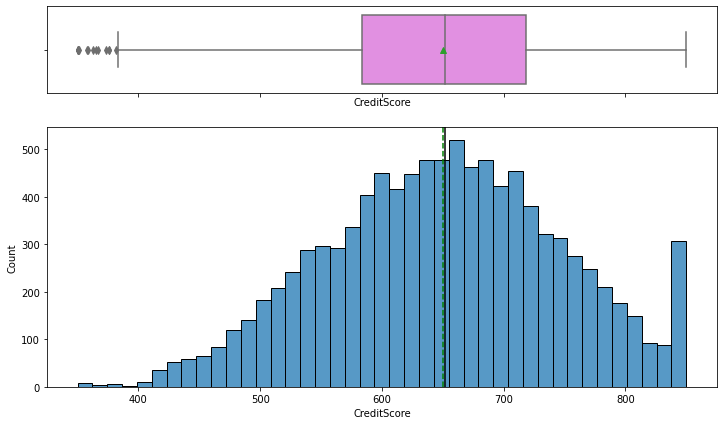

In [16]:
#Histogram to observe the distribution on CreditScore
histogram_boxplot(data, "CreditScore")

Right distributed with some outliers in one side.

In [17]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

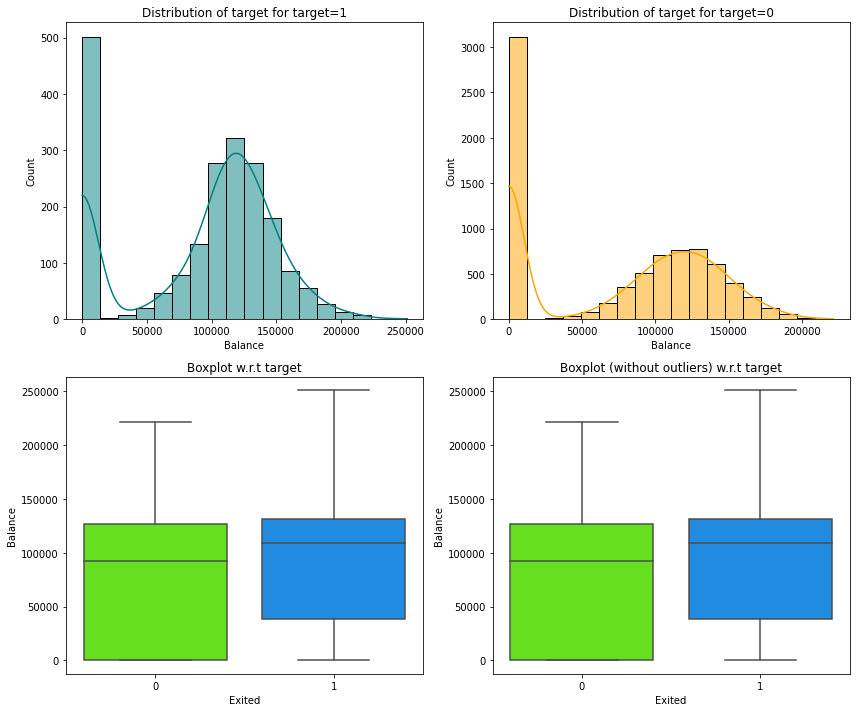

In [18]:
#Distribution on Target for Balance
distribution_plot_wrt_target(data, "Balance", "Exited")

Almost normal distributed. The numbers are similar on both categories.

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

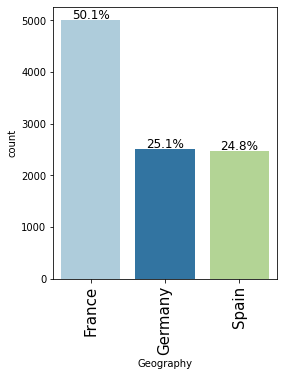

In [20]:
#Labeled barplot for Geography
labeled_barplot(data, "Geography", perc=True)

Half of the dataset population concerns french clientele.

In [21]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


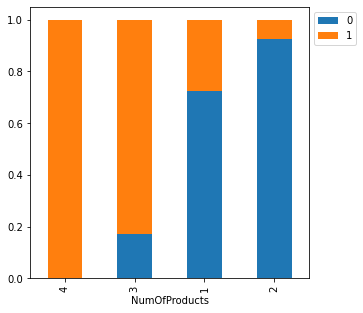

In [22]:
#Barplot about the NumOfProducts
stacked_barplot(data, "NumOfProducts", "Exited")

* A very useful statistic. More products more possible for a customers to leave after 6 months. 
* In case a customers owns 4 products is 100% likely to leave !!! 

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


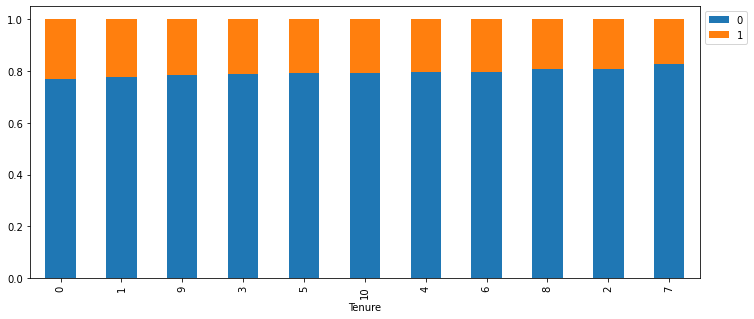

In [23]:
#Barplot about the Tenure
stacked_barplot(data, "Tenure", "Exited")

Likelihood at all values of Tenure. At 0 we find the highest percentage and at 7 the lowest.

0    7963
1    2037
Name: Exited, dtype: int64


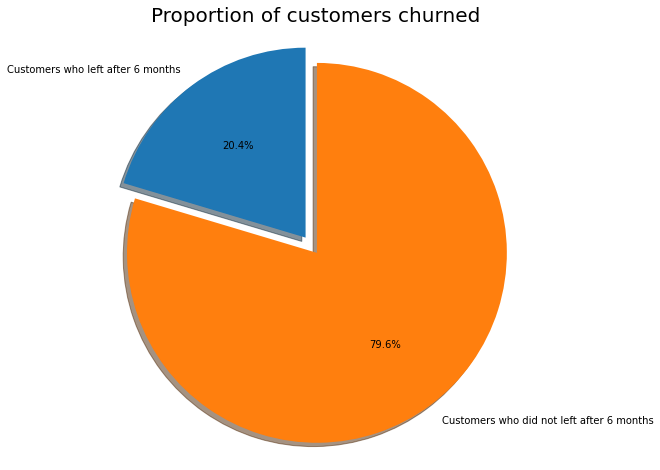

In [24]:
print(data.Exited.value_counts())
labels = 'Customers who left after 6 months', 'Customers who did not left after 6 months'
#sizes = [ds.is_promoted[ds['is_promoted']==1].count(), ds.is_promoted[ds['is_promoted']==0].count()]
sizes = [data.Exited[data['Exited']==1].count(),data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customers churned", size = 20)
plt.show()

We can observe that the dataset is imbalanced as the 1/4 of the entries left the bank after 6 months.

###Relationship between Target and Categorical and Binary features

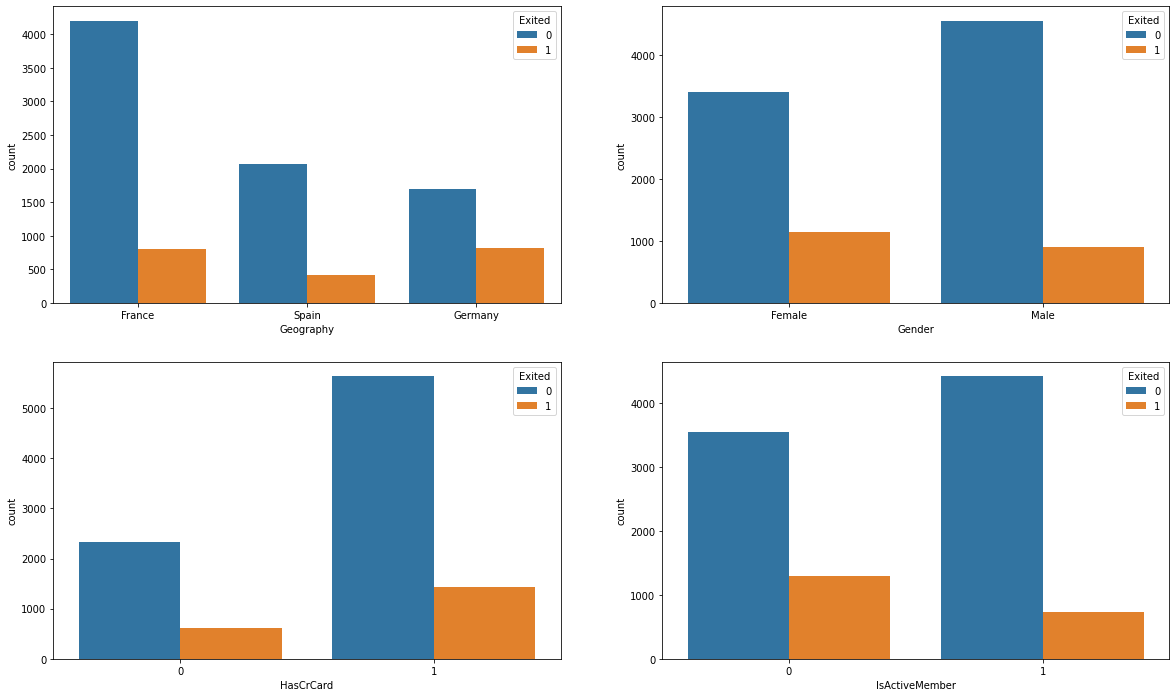

In [25]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
#Countplot for Geography
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])  
#Countplot for Gender
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])  
#Countplot for HasCrCard
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])  
#Countplot for IsActiveMember
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])  

**Geography**
* Half of dataset are French customers. 1 to 4 French left after 6 months.
* Same for the Spanish customers but not for German as there is 1 to 2.

**Gender**
* Females seems to leave more than the male. Approximately 1/3 of women and 1/5 of men left after 6 months.

**HasCrCard**
* There is no difference between the owner of credit card or not as it looks like the 1/5 of them left the bank.

**IsActiveMember**
* Here we can conclude that is more likely for not active customers to leave after 6 months.



###Relationship between Taget and Numerical features

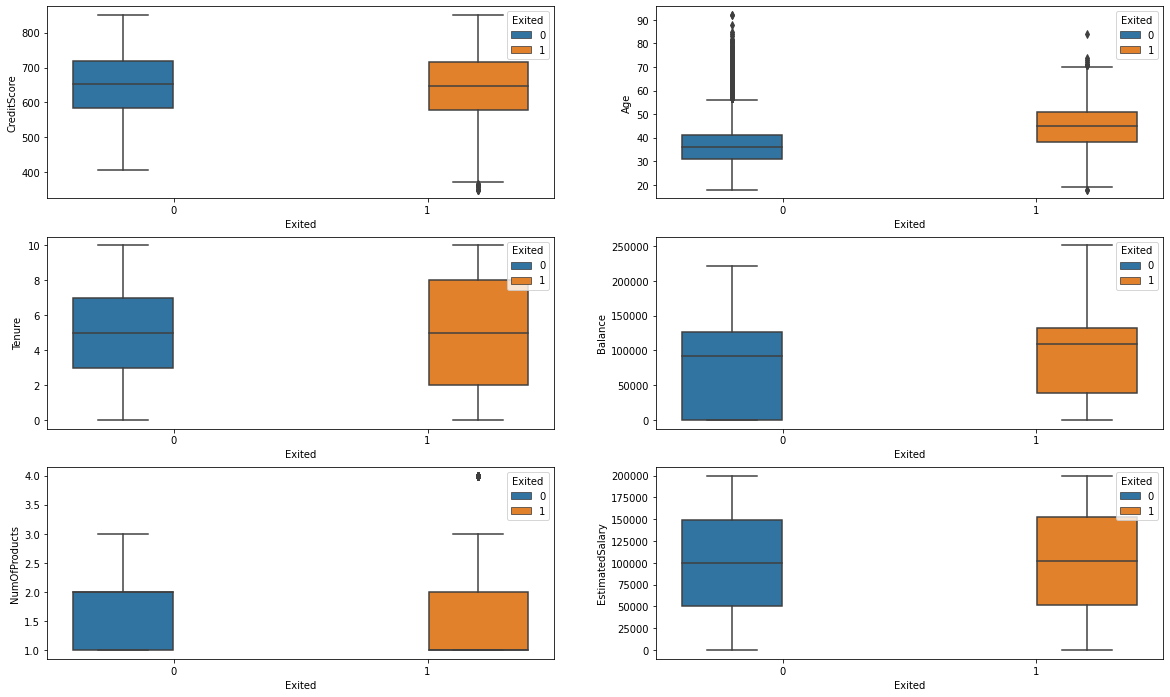

In [26]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
#Boxplot for CreditScore
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0]) 
#Boxplot for Age        
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])  
#Boxplot for Tenure
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0]) 
#Boxplot for Balance
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1]) 
#Boxplot for NumOfProducts
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])     
#Boxplot for EstimatedSalary
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])         

* Relationship at all numerical features seems to be almost the same between Exited and Retained customers.
* Only difference we can observe is at the Age plot in which the number of outliers is big on Retained customers only oneside and byside for Exited.
* Also at CretidScore we find oneside outliers on Exited part but nothing to be worry about. 


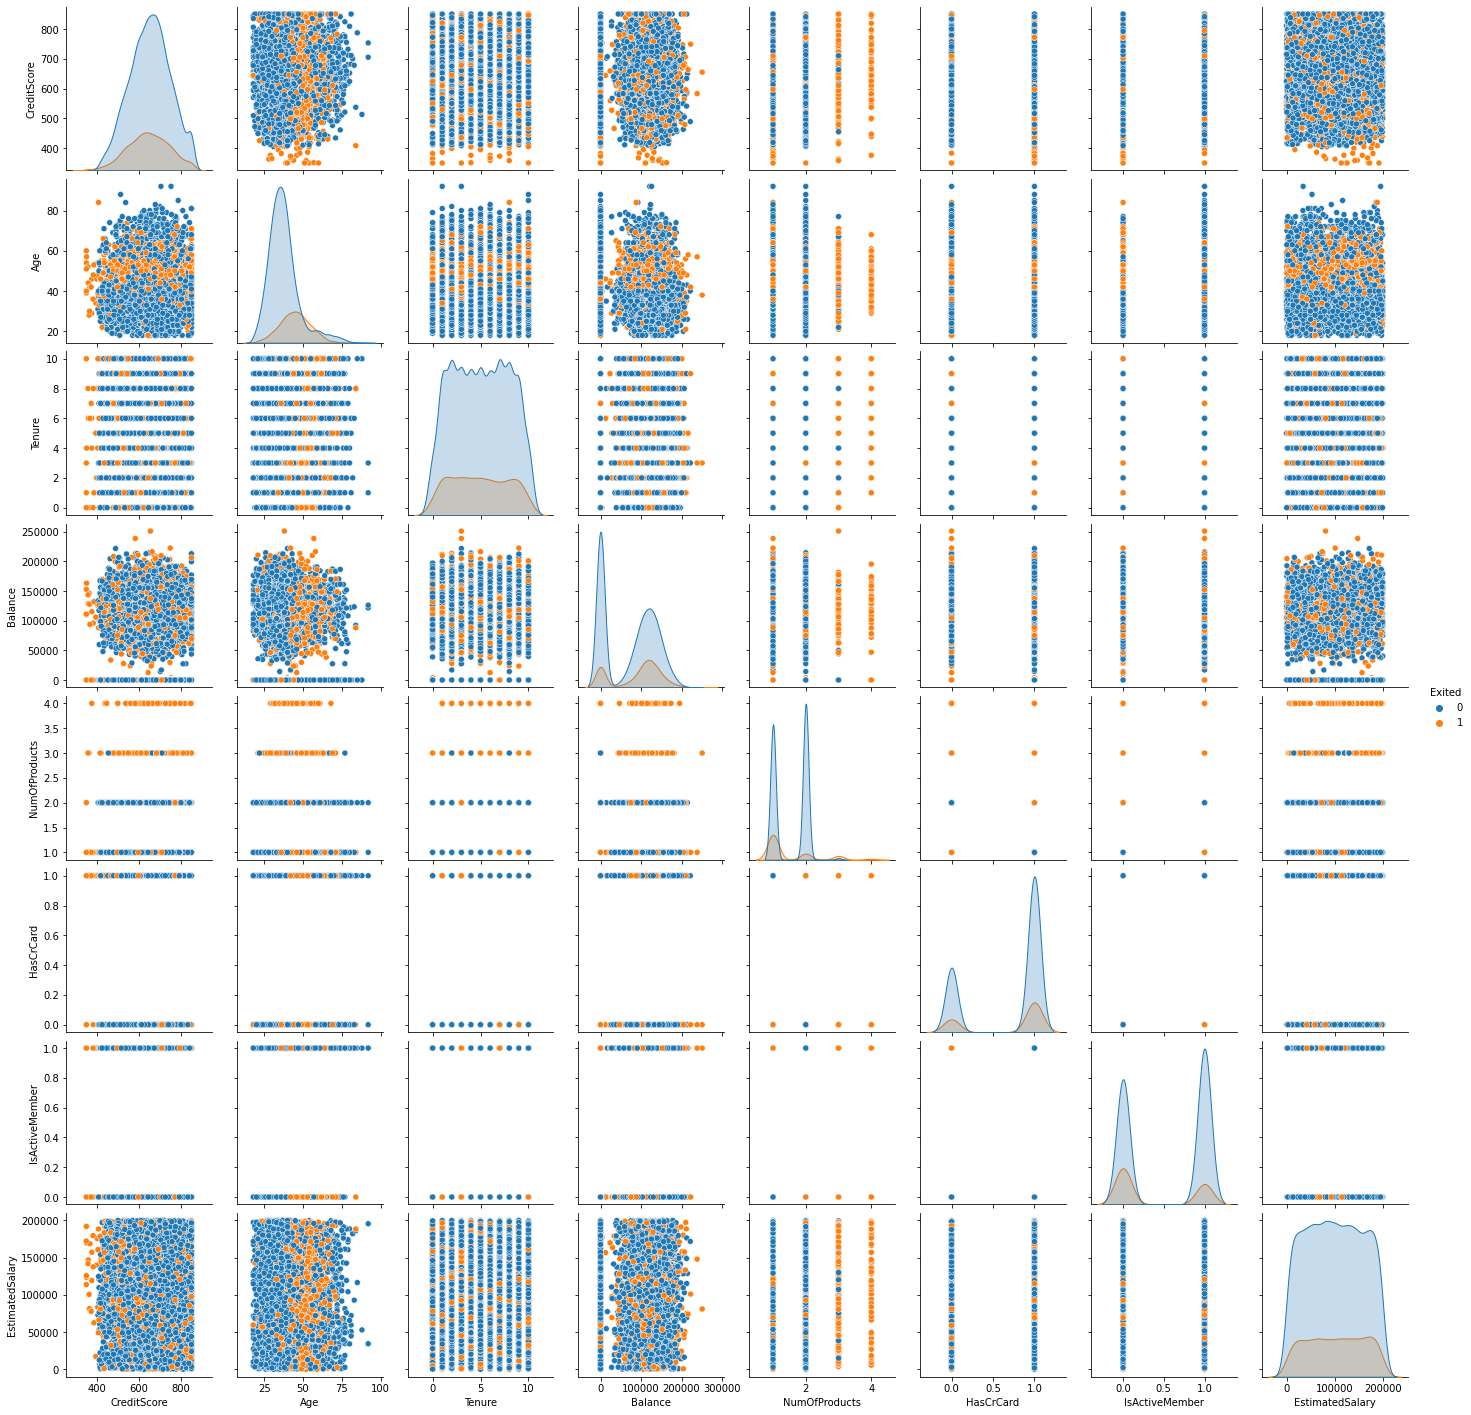

In [27]:
 #Pairplot on the whole dataset
sns.pairplot(data, diag_kind = 'kde', hue = 'Exited') 

A nice pairplot to show us on which points approximately we can find the target values.

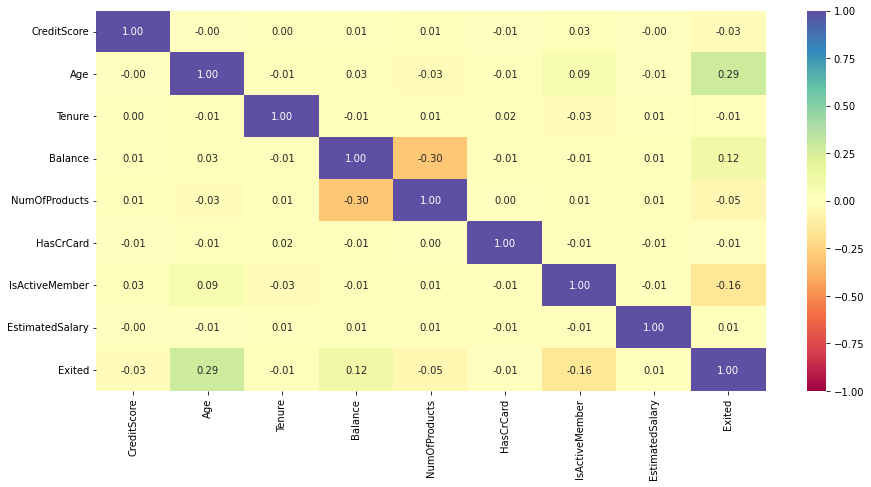

In [28]:
# Heatmap about the correlation between the numerical values
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Seems to have some correlation between NumOfProducts and Balance, as well as between Age and the Target but not very important.

#Data Preparation for modeling

- The Objective is to predict the churn.
- Before you proceed to build a model, you need to split the data into train, test and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale numerical values.
- You will build a model using the train data and then check it's performance

In [29]:
## Storing required categorical variables in cat_dat to apply dummification
cat_data = ['Geography', 'Gender']

In [30]:
##Splitting Independent and dependent variable in X and Y respectively
X = data.drop(['Exited'],axis=1)
Y = data[['Exited']]

print(X.shape)
print(Y.shape)
print(type(X))

(10000, 10)
(10000, 1)
<class 'pandas.core.frame.DataFrame'>


In [31]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [32]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 8000
Number of rows in test data = 2000


In [33]:
## Scaling the data
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.


In [34]:
from sklearn.preprocessing import LabelEncoder
labelencoder_GE = LabelEncoder()
X_train['Gender']= labelencoder_GE.fit_transform(X_train['Gender'])
X_test['Gender']= labelencoder_GE.transform(X_test['Gender'])

In [35]:
labelencoder_GG = LabelEncoder()
X_train['Geography']= labelencoder_GG.fit_transform(X_train['Geography'])
X_test['Geography']= labelencoder_GG.transform(X_test['Geography'])

In [36]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2151 to 6206
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   float64
 1   Geography        8000 non-null   int64  
 2   Gender           8000 non-null   int64  
 3   Age              8000 non-null   float64
 4   Tenure           8000 non-null   float64
 5   Balance          8000 non-null   float64
 6   NumOfProducts    8000 non-null   int64  
 7   HasCrCard        8000 non-null   int64  
 8   IsActiveMember   8000 non-null   int64  
 9   EstimatedSalary  8000 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 687.5 KB


In [37]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
2151,1.058568,0,1,1.715086,0.684723,-1.226059,1,1,0,1.042084
8392,0.913626,1,1,-0.659935,-0.696202,0.413288,1,1,0,-0.623556
5006,1.079274,1,0,-0.184931,-1.731895,0.601687,2,1,1,0.308128
4117,-0.929207,0,1,-0.184931,-0.005739,-1.226059,2,1,0,-0.290199
7182,0.427035,1,1,0.955079,0.339492,0.548318,2,0,1,0.135042


In [38]:
# Checking the shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 10)
(8000, 1)
(2000, 10)
(2000, 1)


## Model evaluation criterion

### Model can make wrong predictions as:
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

### Which case is more important? 
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers. 

### How to reduce this loss i.e need to reduce False Negative?
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

#FROM DUO

##MODEL 1

In [39]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [40]:
# Initializing the ANN
model_1 = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_1.add(Dense(activation = 'relu', input_dim = X_train.shape[1], units=64))
#Add 1st hidden layer
model_1.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model_1.add(Dense(1, activation = 'sigmoid')) 

In [41]:
# Create optimizer with default learning rate
# Compile the model
model_1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [43]:
history_1=model_1.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4916 - accuracy: 0.7903 - val_loss: 0.4606 - val_accuracy: 0.8000
Epoch 2/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4545 - accuracy: 0.7945 - val_loss: 0.4513 - val_accuracy: 0.7950
Epoch 3/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4444 - accuracy: 0.7920 - val_loss: 0.4470 - val_accuracy: 0.7931
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4391 - accuracy: 0.7939 - val_loss: 0.4443 - val_accuracy: 0.7937
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.7958 - val_loss: 0.4422 - val_accuracy: 0.7975
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7987 - val_loss: 0.4400 - val_accuracy: 0.8044
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8016 - val_loss: 0.4386 - val_accuracy: 0.8094
Epoch 

63/63 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8325


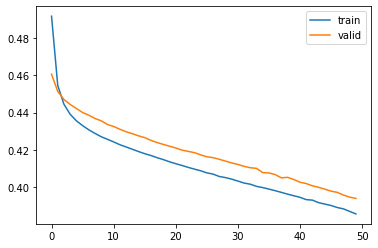

In [44]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_1.history)
hist['epoch'] = history_1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#Printing results
results = model_1.evaluate(X_test, y_test)

In [45]:
y_pred_1=model_1.predict(X_test)
y_pred_1 = (y_pred_1 > 0.5)
y_pred_1

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [46]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

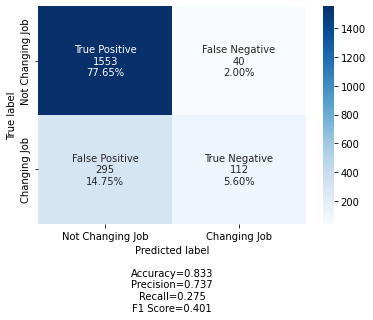

In [47]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [48]:
#Accuracy as per the classification report 
from sklearn import metrics
cr1=metrics.classification_report(y_test,y_pred_1)
print(cr1)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1593
           1       0.74      0.28      0.40       407

    accuracy                           0.83      2000
   macro avg       0.79      0.63      0.65      2000
weighted avg       0.82      0.83      0.80      2000



In General the learning history plot looks very good. The False positive is also very low. Actually that s not a good model because the recall score is very disappointing.

##MODEL 2

**ROC-AUC and Adam Optimizer**

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

In [49]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [50]:
model2 = Sequential()
      #Adding the hidden and output layers
model2.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model2.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [51]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 46,081
Trainable params: 46,081
Non-trainable params: 0
_________________________________________________________________


In [52]:
history2 = model2.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4477 - accuracy: 0.8048 - val_loss: 0.4105 - val_accuracy: 0.8438
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3987 - accuracy: 0.8277 - val_loss: 0.3876 - val_accuracy: 0.8481
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3820 - accuracy: 0.8372 - val_loss: 0.3847 - val_accuracy: 0.8556
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3674 - accuracy: 0.8462 - val_loss: 0.3817 - val_accuracy: 0.8500
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3580 - accuracy: 0.8486 - val_loss: 0.3701 - val_accuracy: 0.8562
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3523 - accuracy: 0.8495 - val_loss: 0.3594 - val_accuracy: 0.8575
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3394 - accuracy: 0.8534 - val_loss: 0.3663 - val_accuracy: 0.8500
Epoch 

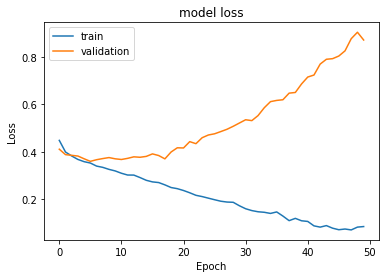

63/63 [==============================] - 0s 2ms/step - loss: 0.9021 - accuracy: 0.7890


In [53]:
#Plotting Train Loss vs Validation Loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Printing results
results = model2.evaluate(X_test, y_test)

Best Threshold=0.065708, G-Mean=0.707


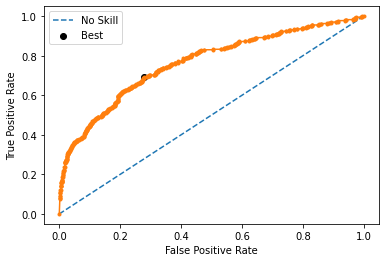

In [54]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat2 = model2.predict(X_test)
# keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]
# calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)
# calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [55]:
#Predicting the results using best as a threshold
y_pred_2=model2.predict(X_test)
y_pred_2 = (y_pred_2 > thresholds2[ix])
y_pred_2

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

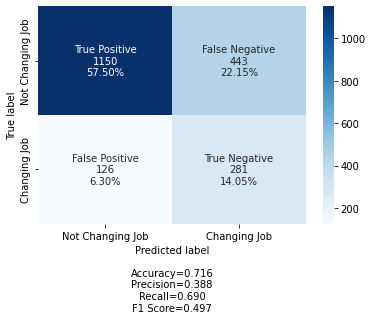

In [56]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test, y_pred_2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [57]:
#Accuracy as per the classification report 
from sklearn import metrics
cr2=metrics.classification_report(y_test,y_pred_2)
print(cr2)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.69      0.50       407

    accuracy                           0.72      2000
   macro avg       0.64      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000



Better Recal score but the False Negative percentage too high. Let's find a better one. 

##MODEL 3

**Batch Normalization**

In [58]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [59]:
model3 = Sequential()
model3.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model3.add(BatchNormalization())
model3.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [60]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [61]:
history_3 = model3.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 10ms/step - loss: 0.4793 - accuracy: 0.7748 - val_loss: 0.4605 - val_accuracy: 0.8112
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3717 - accuracy: 0.8420 - val_loss: 0.3953 - val_accuracy: 0.8375
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3458 - accuracy: 0.8539 - val_loss: 0.3624 - val_accuracy: 0.8500
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.8630 - val_loss: 0.3419 - val_accuracy: 0.8619
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3245 - accuracy: 0.8636 - val_loss: 0.3330 - val_accuracy: 0.8725
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3189 - accuracy: 0.8669 - val_loss: 0.3367 - val_accuracy: 0.8656
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3121 - accuracy: 0.8712 - val_loss: 0.3437 - val_accuracy: 0.8612
Epoch

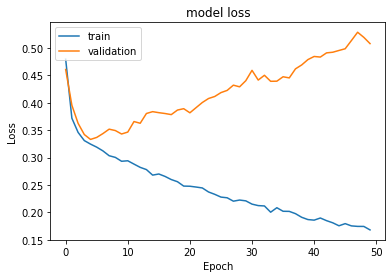

63/63 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.8245


In [62]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Printing results
results = model3.evaluate(X_test, y_test)

Best Threshold=0.120418, G-Mean=0.729


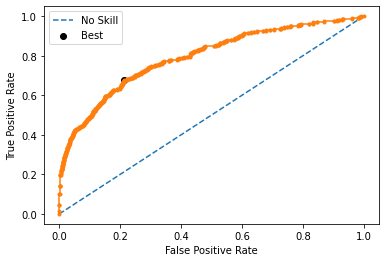

In [63]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat3 = model3.predict(X_test)
# keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]
# calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)
# calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [64]:
y_pred_3=model3.predict(X_test)
y_pred_3 = (y_pred_3 > thresholds3[ix])
y_pred_3

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

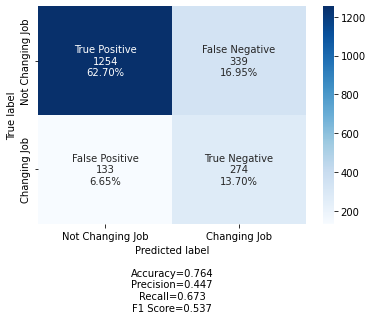

In [65]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test, y_pred_3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [66]:
#Accuracy as per the classification report 
from sklearn import metrics
cr3=metrics.classification_report(y_test,y_pred_3)
print(cr3)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1593
           1       0.45      0.67      0.54       407

    accuracy                           0.76      2000
   macro avg       0.68      0.73      0.69      2000
weighted avg       0.81      0.76      0.78      2000



Lower Recal but better FN score. Not recommended and keep searching for better model.

##MODEL 4

 **Dropout**

In [67]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [68]:
model4 = Sequential()
model4.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model4.add(Dropout(0.2))
model4.add(Dense(128,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(64,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='relu'))
model4.add(Dense(1, activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(0.001)
model4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [69]:
model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [70]:
history_4 = model4.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 1s 7ms/step - loss: 0.4680 - accuracy: 0.7909 - val_loss: 0.4363 - val_accuracy: 0.8100
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.8098 - val_loss: 0.4187 - val_accuracy: 0.8419
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4139 - accuracy: 0.8241 - val_loss: 0.3970 - val_accuracy: 0.8413
Epoch 4/50
100/100 [==============================] - 1s 5ms/step - loss: 0.4039 - accuracy: 0.8278 - val_loss: 0.3917 - val_accuracy: 0.8438
Epoch 5/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3982 - accuracy: 0.8333 - val_loss: 0.3877 - val_accuracy: 0.8500
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3917 - accuracy: 0.8394 - val_loss: 0.3780 - val_accuracy: 0.8531
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.8384 - val_loss: 0.3696 - val_accuracy: 0.8544
Epoch 

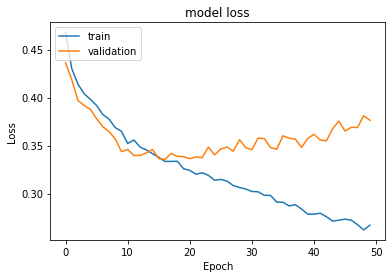

63/63 [==============================] - 0s 3ms/step - loss: 0.4049 - accuracy: 0.8505


In [71]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Printing results
results = model4.evaluate(X_test, y_test)

Best Threshold=0.230154, G-Mean=0.741


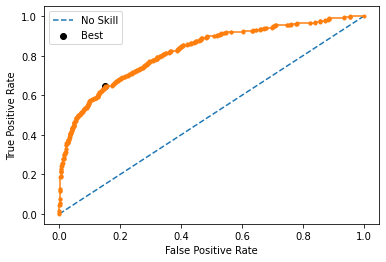

In [72]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat4 = model4.predict(X_test)
# keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]
# calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)
# calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [73]:
y_pred_4=model4.predict(X_test)
y_pred_4 = (y_pred_4 > thresholds4[ix])
y_pred_4

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

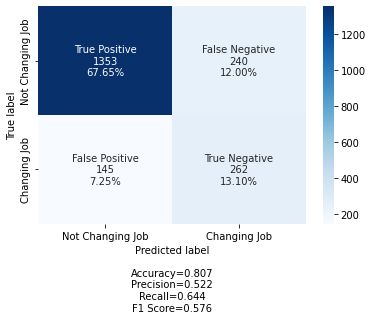

In [74]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test, y_pred_4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [75]:
#Accuracy as per the classification report 
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_4)
print(cr4)

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1593
           1       0.52      0.64      0.58       407

    accuracy                           0.81      2000
   macro avg       0.71      0.75      0.73      2000
weighted avg       0.83      0.81      0.81      2000



It look like with Dropout tecjnic that we improved the FP but we receive less Recall score.


##MODEL 5 

**Random Search CV**

Some important parameters to look out for while optimizing neural networks are:

-Type of architecture

-Number of Layers

-Number of Neurons in a layer

-Regularization parameters

-Learning Rate

-Type of optimization / backpropagation technique to use

-Dropout rate

-Weight sharing

In [76]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [77]:
def create_model5(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [78]:
keras_estimator = KerasClassifier(build_fn=create_model5, verbose=1)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [79]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4610 - accuracy: 0.7927 - val_loss: 0.4383 - val_accuracy: 0.8025
Best: 0.804125 using {'lr': 0.001, 'batch_size': 32}


In [80]:
estimator_v5=create_model5(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [81]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_5=estimator_v5.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4665 - accuracy: 0.7980 - val_loss: 0.4371 - val_accuracy: 0.8225
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4328 - accuracy: 0.8094 - val_loss: 0.4202 - val_accuracy: 0.8388
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4201 - accuracy: 0.8206 - val_loss: 0.4050 - val_accuracy: 0.8419
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.8275 - val_loss: 0.3949 - val_accuracy: 0.8481
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4064 - accuracy: 0.8298 - val_loss: 0.3956 - val_accuracy: 0.8494
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3979 - accuracy: 0.8341 - val_loss: 0.3793 - val_accuracy: 0.8575
Epoch 7/50
100/100 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.8355 - val_loss: 0.3755 - val_accuracy: 0.8537
Epoch 

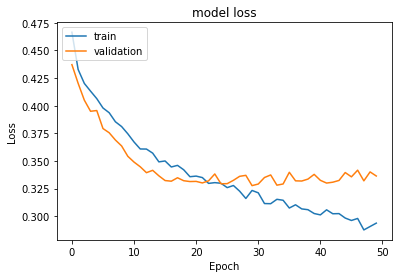

63/63 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8620


In [82]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Printing results
results = estimator_v5.evaluate(X_test, y_test)

Best Threshold=0.246532, G-Mean=0.764


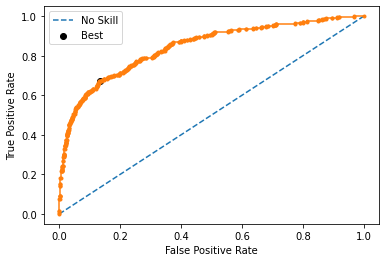

In [83]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat5 = estimator_v5.predict(X_test)
# keep probabilities for the positive outcome only
yhat5 = yhat5[:, 0]
# calculate roc curves
fpr, tpr, thresholds5 = roc_curve(y_test, yhat5)
# calculate the g-mean for each threshold
gmeans5 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans5)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds5[ix], gmeans5[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [84]:
y_pred_5=estimator_v5.predict(X_test)
y_pred_5 = (y_pred_5 > thresholds5[ix])
y_pred_5

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

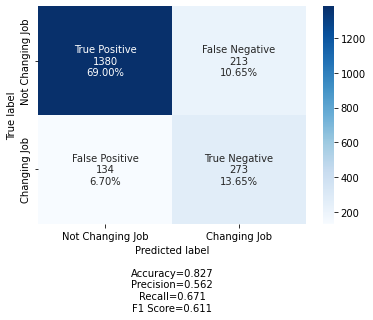

In [85]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test, y_pred_5)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm5, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [86]:
#Accuracy as per the classification report 
from sklearn import metrics
cr5=metrics.classification_report(y_test,y_pred_5)
print(cr5)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.56      0.67      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



With Random Search we achive smoother loss curves for both train and validation. Recall score is untill now the best we took and the FN a little bit more that the previous model.

##MODEL 6

**Grid Search CV**

##### Using Grid search

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [87]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [88]:
def create_model6(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [89]:
keras_estimator = KerasClassifier(build_fn=create_model6, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [90]:
import time
  
# store starting time
begin = time.time()


grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 1s 4ms/step - loss: 0.4610 - accuracy: 0.7927 - val_loss: 0.4383 - val_accuracy: 0.8025
Best: 0.804874 using {'batch_size': 32, 'lr': 0.001}
Total runtime of the program is 36.03373146057129


In [91]:
estimator_v6=create_model6(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [92]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v6.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_6=estimator_v6.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 7ms/step - loss: 0.4665 - accuracy: 0.7980 - val_loss: 0.4371 - val_accuracy: 0.8225
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4328 - accuracy: 0.8094 - val_loss: 0.4202 - val_accuracy: 0.8388
Epoch 3/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4201 - accuracy: 0.8206 - val_loss: 0.4050 - val_accuracy: 0.8419
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.8275 - val_loss: 0.3949 - val_accuracy: 0.8481
Epoch 5/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4064 - accuracy: 0.8298 - val_loss: 0.3956 - val_accuracy: 0.8494
Epoch 6/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3979 - accuracy: 0.8341 - val_loss: 0.3793 - val_accuracy: 0.8575
Epoch 7/50
100/100 [==============================] - 0s 5ms/step - loss: 0.3936 - accuracy: 0.8355 - val_loss: 0.3755 - val_accuracy: 0.8537
Epoch 

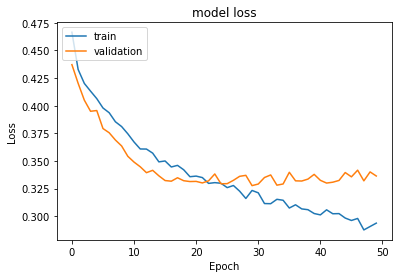

63/63 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8620


In [93]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_6.history['loss'])
plt.plot(history_6.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Printing results
results = estimator_v6.evaluate(X_test, y_test)

Best Threshold=0.246532, G-Mean=0.764


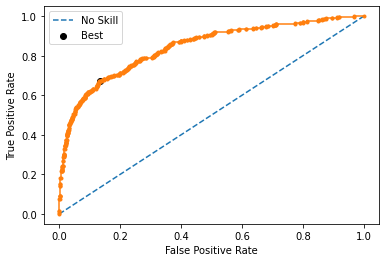

In [94]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat6 = estimator_v6.predict(X_test)
# keep probabilities for the positive outcome only
yhat6 = yhat6[:, 0]
# calculate roc curves
fpr, tpr, thresholds6 = roc_curve(y_test, yhat6)
# calculate the g-mean for each threshold
gmeans6 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans6)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds6[ix], gmeans6[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [95]:
y_pred_6=estimator_v6.predict(X_test)
y_pred_6 = (y_pred_6 > thresholds6[ix])
y_pred_6

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

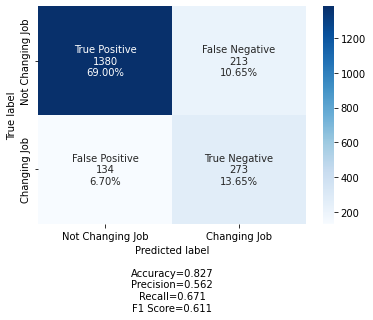

In [96]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm6=confusion_matrix(y_test, y_pred_6)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm6, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [97]:
#Accuracy as per the classification report 
from sklearn import metrics
cr6=metrics.classification_report(y_test,y_pred_6)
print(cr6)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.56      0.67      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



At this model with Grid Search CV we receive exactly the same results as with random.

##MODEL 7

**Dask Search CV**


In [98]:
!pip install dask-ml 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
# importing library
from dask_ml.model_selection import GridSearchCV as DaskGridSearchCV

In [100]:
def create_model7(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [101]:
keras_estimator = KerasClassifier(build_fn=create_model7, verbose=1)
# define the grid search parameters
param_grid = {
    'batch_size':[64,32, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
dask = DaskGridSearchCV(estimator=keras_estimator, 
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [102]:
import time
  
# store starting time
begin = time.time()


dask_result = dask.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (dask_result.best_score_, dask_result.best_params_))
means = dask_result.cv_results_['mean_test_score']
stds = dask_result.cv_results_['std_test_score']
params = dask_result.cv_results_['params']

time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime of the program is {end - begin}")

200/200 [==============================] - 1s 5ms/step - loss: 0.4627 - accuracy: 0.7966 - val_loss: 0.4359 - val_accuracy: 0.8075
Best: 0.806625 using {'batch_size': 32, 'lr': 0.001}
Total runtime of the program is 70.32194995880127


In [103]:
estimator_v7=create_model7(batch_size=dask_result.best_params_['batch_size'],lr=dask_result.best_params_['lr'])

estimator_v7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               2816      
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)               

In [104]:
optimizer = tf.keras.optimizers.Adam(dask_result.best_params_['lr'])
estimator_v7.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_7=estimator_v7.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4789 - accuracy: 0.7866 - val_loss: 0.4398 - val_accuracy: 0.8031
Epoch 2/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4382 - accuracy: 0.8033 - val_loss: 0.4316 - val_accuracy: 0.8319
Epoch 3/50
100/100 [==============================] - 1s 6ms/step - loss: 0.4274 - accuracy: 0.8127 - val_loss: 0.4193 - val_accuracy: 0.8344
Epoch 4/50
100/100 [==============================] - 0s 5ms/step - loss: 0.4192 - accuracy: 0.8209 - val_loss: 0.4040 - val_accuracy: 0.8444
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4120 - accuracy: 0.8300 - val_loss: 0.3933 - val_accuracy: 0.8494
Epoch 6/50
100/100 [==============================] - 1s 8ms/step - loss: 0.4016 - accuracy: 0.8327 - val_loss: 0.3868 - val_accuracy: 0.8519
Epoch 7/50
100/100 [==============================] - 1s 9ms/step - loss: 0.3945 - accuracy: 0.8363 - val_loss: 0.3780 - val_accuracy: 0.8512
Epoch 

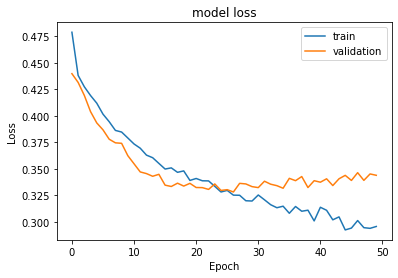

63/63 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8630


In [105]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

#Printing results
results = estimator_v7.evaluate(X_test, y_test)

Best Threshold=0.181140, G-Mean=0.771


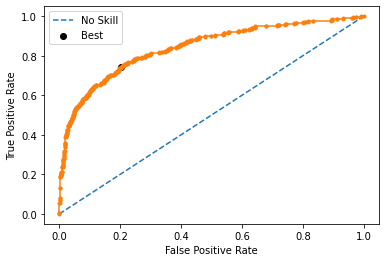

In [106]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat7 = estimator_v7.predict(X_test)
# keep probabilities for the positive outcome only
yhat7 = yhat7[:, 0]
# calculate roc curves
fpr, tpr, thresholds7 = roc_curve(y_test, yhat7)
# calculate the g-mean for each threshold
gmeans7 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans7)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds7[ix], gmeans7[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [107]:
y_pred_7=estimator_v7.predict(X_test)
y_pred_7 = (y_pred_7 > thresholds7[ix])
y_pred_7

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

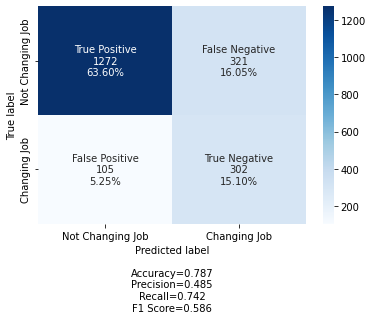

In [108]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm7=confusion_matrix(y_test, y_pred_7)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm7, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [109]:
#Accuracy as per the classification report 
from sklearn import metrics
cr7=metrics.classification_report(y_test,y_pred_7)
print(cr7)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



With Dask Search we achive the best recal but a higher FN score. 

##MODEL 8

**Keras Tuner**

In [110]:
## Install Keras Tuner
!pip install keras-tuner 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [112]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [113]:
def build_model(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [114]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
     project_name='Job_')

In [115]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [116]:
### Searching the best model on X and y train
tuner.search(X_train, y_train,
             epochs=5,
             validation_split = 0.2)

In [117]:
## Printing the best models with their hyperparameters
tuner.results_summary()

Results summary
Results in ./Job_
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8695833285649618
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.8672916690508524
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.8616666595141093
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160
units_4: 160
units_5: 192
units_6: 96
units_7: 128
units_8: 96
Score: 0.8487499952316284
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
uni

In [118]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [119]:
model8 = Sequential()
model8.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model8.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model8.add(Dense(1, activation = 'sigmoid'))

In [120]:
model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1760      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,505
Trainable params: 121,505
Non-trai

In [121]:
optimizer = tf.keras.optimizers.Adam(0.001)
model8.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [122]:
history_8 = model8.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
100/100 [==============================] - 2s 9ms/step - loss: 0.4469 - accuracy: 0.8044 - val_loss: 0.4247 - val_accuracy: 0.8181
Epoch 2/50
100/100 [==============================] - 1s 6ms/step - loss: 0.3993 - accuracy: 0.8267 - val_loss: 0.3889 - val_accuracy: 0.8425
Epoch 3/50
100/100 [==============================] - 1s 8ms/step - loss: 0.3783 - accuracy: 0.8358 - val_loss: 0.3835 - val_accuracy: 0.8487
Epoch 4/50
100/100 [==============================] - 1s 12ms/step - loss: 0.3552 - accuracy: 0.8500 - val_loss: 0.3902 - val_accuracy: 0.8400
Epoch 5/50
100/100 [==============================] - 1s 12ms/step - loss: 0.3450 - accuracy: 0.8542 - val_loss: 0.3640 - val_accuracy: 0.8594
Epoch 6/50
100/100 [==============================] - 1s 11ms/step - loss: 0.3294 - accuracy: 0.8634 - val_loss: 0.3611 - val_accuracy: 0.8569
Epoch 7/50
100/100 [==============================] - 1s 10ms/step - loss: 0.3117 - accuracy: 0.8653 - val_loss: 0.3715 - val_accuracy: 0.8462
Ep

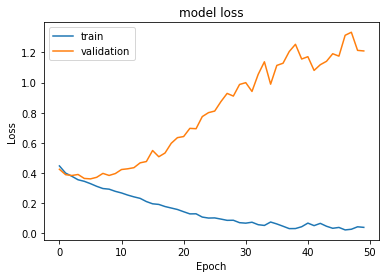

63/63 [==============================] - 0s 4ms/step - loss: 1.2484 - accuracy: 0.7975


In [123]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_8.history['loss'])
plt.plot(history_8.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Printing results
results = model8.evaluate(X_test, y_test)

Best Threshold=0.023439, G-Mean=0.712


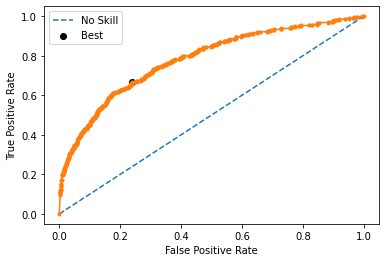

In [124]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat8 = model8.predict(X_test)
# keep probabilities for the positive outcome only
yhat8 = yhat8[:, 0]
# calculate roc curves
fpr, tpr, thresholds8 = roc_curve(y_test, yhat8)
# calculate the g-mean for each threshold
gmeans8 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans8)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds8[ix], gmeans8[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [125]:
y_pred_8=model8.predict(X_test)
y_pred_8 = (y_pred_8 > thresholds8[ix])
y_pred_8

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

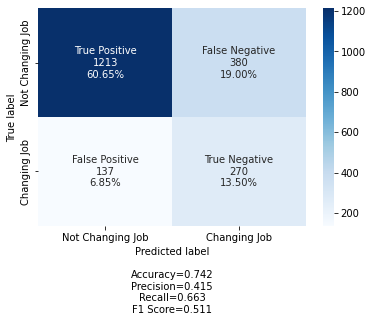

In [126]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm8=confusion_matrix(y_test, y_pred_8)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm8, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [127]:
#Accuracy as per the classification report 
from sklearn import metrics
cr8=metrics.classification_report(y_test,y_pred_8)
print(cr8)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1593
           1       0.42      0.66      0.51       407

    accuracy                           0.74      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.80      0.74      0.76      2000



No improvement with Keras Tuner technic. The recall is lower than the previous score and the FN score higher.

##MODEL 9

**SMOTE + Keras Tuner**

In [128]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [129]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [130]:
def build_model_2(h):
    model = keras.Sequential()
    for i in range(h.Int('num_layers', 2, 10)):
        model.add(layers.Dense(units=h.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=256,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [131]:
tuner_2 = RandomSearch(
    build_model_2,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    project_name='Job_Switch')

In [132]:
tuner_2.search_space_summary()

Search space summary
Default search space size: 11
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [133]:
tuner_2.search(X_sm, y_sm,
             epochs=5,
             validation_split = 0.2)

In [134]:
tuner_2.results_summary()

Results summary
Results in ./Job_Switch
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 8
units_0: 160
units_1: 64
learning_rate: 0.001
units_2: 160
units_3: 64
units_4: 192
units_5: 32
units_6: 224
units_7: 96
units_8: 192
Score: 0.8112244804700216
Trial summary
Hyperparameters:
num_layers: 5
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 96
units_3: 224
units_4: 256
units_5: 160
units_6: 192
units_7: 224
units_8: 224
Score: 0.7987964351971945
Trial summary
Hyperparameters:
num_layers: 5
units_0: 160
units_1: 160
learning_rate: 0.001
units_2: 224
units_3: 128
units_4: 224
units_5: 64
units_6: 160
units_7: 64
units_8: 32
Score: 0.7934327721595764
Trial summary
Hyperparameters:
num_layers: 9
units_0: 192
units_1: 96
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
Score: 0.7167713244756063
Trial summary
Hyperparameters:
num_layers: 9
units_0: 128
units_1: 32
learning_rate: 0.0001
units_2: 160
units_3: 160


In [135]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [136]:
model9 = Sequential()
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model9.add(Dense(160,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(224,activation='relu',kernel_initializer='he_uniform'))
model9.add(Dense(1, activation = 'sigmoid'))
      #Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model9.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [137]:
model9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 160)               1760      
                                                                 
 dense_1 (Dense)             (None, 160)               25760     
                                                                 
 dense_2 (Dense)             (None, 224)               36064     
                                                                 
 dense_3 (Dense)             (None, 128)               28800     
                                                                 
 dense_4 (Dense)             (None, 224)               28896     
                                                                 
 dense_5 (Dense)             (None, 1)                 225       
                                                                 
Total params: 121,505
Trainable params: 121,505
Non-trai

In [138]:
history_9 = model9.fit(X_sm,y_sm,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
160/160 [==============================] - 2s 9ms/step - loss: 0.5116 - accuracy: 0.7456 - val_loss: 0.6296 - val_accuracy: 0.6370
Epoch 2/50
160/160 [==============================] - 2s 11ms/step - loss: 0.4339 - accuracy: 0.7907 - val_loss: 0.9004 - val_accuracy: 0.5181
Epoch 3/50
160/160 [==============================] - 2s 10ms/step - loss: 0.4110 - accuracy: 0.8090 - val_loss: 0.4982 - val_accuracy: 0.7688
Epoch 4/50
160/160 [==============================] - 2s 13ms/step - loss: 0.3705 - accuracy: 0.8318 - val_loss: 0.5470 - val_accuracy: 0.7461
Epoch 5/50
160/160 [==============================] - 2s 12ms/step - loss: 0.3540 - accuracy: 0.8444 - val_loss: 0.5294 - val_accuracy: 0.7272
Epoch 6/50
160/160 [==============================] - 2s 11ms/step - loss: 0.3341 - accuracy: 0.8528 - val_loss: 0.3844 - val_accuracy: 0.8234
Epoch 7/50
160/160 [==============================] - 2s 10ms/step - loss: 0.3164 - accuracy: 0.8672 - val_loss: 0.5098 - val_accuracy: 0.7508


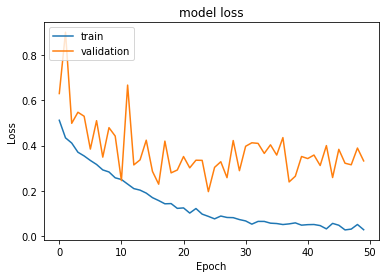

63/63 [==============================] - 0s 2ms/step - loss: 1.3966 - accuracy: 0.8005


In [139]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_9.history['loss'])
plt.plot(history_9.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


#Printing results
results = model9.evaluate(X_test, y_test)

Best Threshold=0.015761, G-Mean=0.731


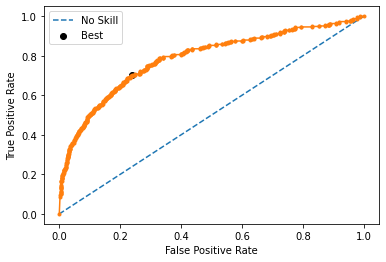

In [140]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat9 = model9.predict(X_test)
# keep probabilities for the positive outcome only
yhat9 = yhat9[:, 0]
# calculate roc curves
fpr, tpr, thresholds9 = roc_curve(y_test, yhat9)
# calculate the g-mean for each threshold
gmeans9 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans9)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds9[ix], gmeans9[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [141]:
y_pred_9=model9.predict(X_test)
y_pred_9 = (y_pred_9 > thresholds9[ix])
y_pred_9

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

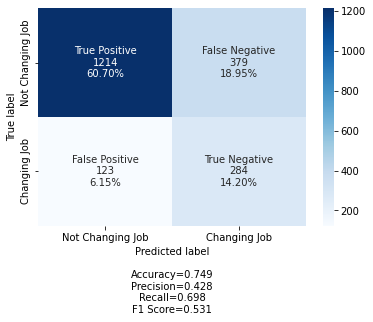

In [142]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm9=confusion_matrix(y_test, y_pred_9)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm9, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [143]:
#Accuracy as per the classification report 
from sklearn import metrics
cr9=metrics.classification_report(y_test,y_pred_9)
print(cr9)

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1593
           1       0.43      0.70      0.53       407

    accuracy                           0.75      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.75      0.77      2000



Neither with this compination we archived a better score. We will keep find a better model further.

##MODEL 10

**Grid on SMOTE**

In [144]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [145]:
def create_model10(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    #model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
    #model.add(Dropout(0.3))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [146]:
keras_estimator = KerasClassifier(build_fn=create_model10, verbose=1)

In [147]:
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64, 128],
    "lr":[0.001,0.01,0.1],}

kfold_splits = 3
grid = GridSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=1) 

Fitting 3 folds for each of 9 candidates, totalling 27 fits
200/200 [==============================] - 2s 5ms/step - loss: 0.4550 - accuracy: 0.8052 - val_loss: 0.4358 - val_accuracy: 0.8313


In [148]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: 0.804876 using {'batch_size': 32, 'lr': 0.01}


In [149]:
estimator_v10=create_model10(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

estimator_v10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2816      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [150]:
optimizer = tf.keras.optimizers.Adam(grid_result.best_params_['lr'])
estimator_v10.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_10=estimator_v10.fit(X_sm, y_sm, epochs=50, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_split=0.2)

Epoch 1/50
319/319 [==============================] - 2s 5ms/step - loss: 0.5517 - accuracy: 0.7235 - val_loss: 0.6151 - val_accuracy: 0.5651
Epoch 2/50
319/319 [==============================] - 1s 4ms/step - loss: 0.5138 - accuracy: 0.7585 - val_loss: 0.7753 - val_accuracy: 0.5726
Epoch 3/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4960 - accuracy: 0.7665 - val_loss: 0.5514 - val_accuracy: 0.6260
Epoch 4/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4699 - accuracy: 0.7821 - val_loss: 0.6427 - val_accuracy: 0.6201
Epoch 5/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4610 - accuracy: 0.7827 - val_loss: 0.5671 - val_accuracy: 0.6519
Epoch 6/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4559 - accuracy: 0.7866 - val_loss: 0.5225 - val_accuracy: 0.6880
Epoch 7/50
319/319 [==============================] - 1s 4ms/step - loss: 0.4463 - accuracy: 0.7941 - val_loss: 0.6018 - val_accuracy: 0.6821
Epoch 

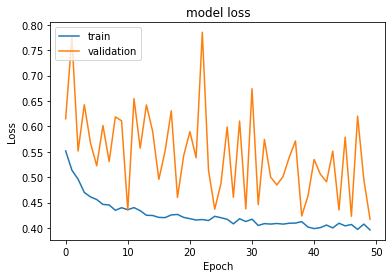

63/63 [==============================] - 0s 2ms/step - loss: 0.4359 - accuracy: 0.7940


In [151]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_10.history['loss'])
plt.plot(history_10.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#Printing results
results = estimator_v10.evaluate(X_test, y_test)

Best Threshold=0.448011, G-Mean=0.771


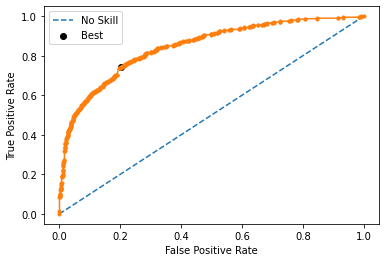

In [152]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat10 = estimator_v10.predict(X_test)
# keep probabilities for the positive outcome only
yhat10 = yhat10[:, 0]
# calculate roc curves
fpr, tpr, thresholds10 = roc_curve(y_test, yhat10)
# calculate the g-mean for each threshold
gmeans10 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans10)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds10[ix], gmeans10[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [153]:
y_pred_10=estimator_v10.predict(X_test)
y_pred_10 = (y_pred_10 > thresholds10[ix])
y_pred_10

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

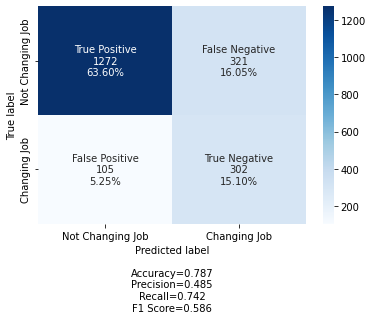

In [154]:
#Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix
cm10=confusion_matrix(y_test, y_pred_10)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm10, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [155]:
#Accuracy as per the classification report 
from sklearn import metrics
cr10=metrics.classification_report(y_test,y_pred_10)
print(cr10)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.74      0.59       407

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.79      0.80      2000



With Grid on SMote we manage to have the same best result as this one with Dask. Although the loss curves aren't so smooth on the validation set as at Dask. 

## Model 11

**Balanced Dataset**

**Earlystopping callback**

In [321]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [322]:
#Initializing the neural network
model11 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model11.add(Dense(32,activation='relu',input_dim = 10))
# Complete the code to add dropout with dropout_rate= 0.2
model11.add(Dropout(0.2))
# Adding the first hidden layer with 16 neurons with relu as activation functions
model11.add(Dense(16,activation='relu'))
# Complete the code to add dropout with dropout_rate= 0.2
model11.add(Dropout(0.2))
# Adding the first hidden layer with 8 neurons with relu as activation functions
model11.add(Dense(8,activation='relu'))
# Adding the output layer
model11.add(Dense(1, activation = 'sigmoid'))

In [323]:
# Summary of the model
model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainabl

In [324]:
# Initialize the ANN with Adam optimizer 
optimizer = tf.keras.optimizers.Adam(0.001)

# Complete the code to define earlystopping as callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=0, mode='min', restore_best_weights= True) 

# Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
model11.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


In [325]:
#Fitting the ANN with batch_size = 64 and 50 epochs 
history_11 = model11.fit(X_train,y_train,batch_size=64,epochs=50,verbose=0,validation_split = 0.2,callbacks=[es_cb])

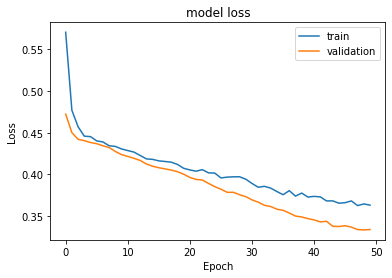

In [326]:
# Complete the code to plot the Train Loss and Validation Loss
plt.plot(history_11.history['loss'])
plt.plot(history_11.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

Best Threshold=0.211596, G-Mean=0.768


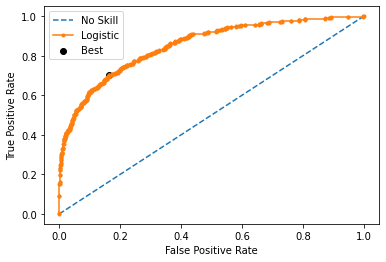

In [327]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat11 = model11.predict(X_test)
# keep probabilities for the positive outcome only
yhat11 = yhat11[:, 0]
# calculate roc curves
fpr, tpr, thresholds11 = roc_curve(y_test, yhat11)
# calculate the g-mean for each threshold
gmeans11 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans11)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds11[ix], gmeans11[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [328]:
#Predicting the results using best as a threshold
y_pred11=model11.predict(X_test)
y_pred11 = (y_pred11 > thresholds11[ix])
y_pred11

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

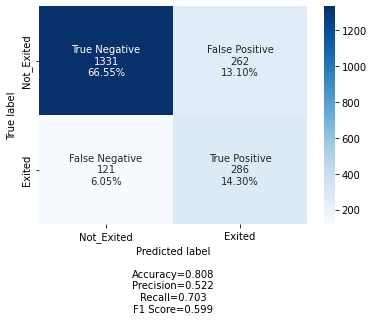

In [329]:
#confusion matrix

cm11=confusion_matrix(y_test, y_pred11)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm11, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [330]:
# Complete the code to obtain the classification report
cr11=metrics.classification_report(y_test,y_pred11)
print(cr11)

              precision    recall  f1-score   support

           0       0.92      0.84      0.87      1593
           1       0.52      0.70      0.60       407

    accuracy                           0.81      2000
   macro avg       0.72      0.77      0.74      2000
weighted avg       0.84      0.81      0.82      2000



Althought the smotth loss curves for both, the Recall score is not so high but FN little lower as our best untill now model.

#### Hyperparameter Optimization

#Actionable Insights and Recommendations 

---



Between those 11 models we will recommend any of those 3 models:


1.   Dask Search CV
2.   Grid with SMOTE
3.   Earlystopping callback

We highly recommend to try to find further for a better model to achive better results as those upper models doesn't bring the best neither False Negative nor Recall score. But our perspective the Dark Search CV model is the best of those 3.  





#### Happy Learning!